In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer


#

In [2]:
data= pd.read_stata('DataDrive2030_PD_EXTERNAL.dta')

FileNotFoundError: [Errno 2] No such file or directory: 'DataDrive2030_PD_EXTERNAL.dta'

In [ ]:
# Checking the shape of the dataset
data.shape

In [ ]:
# having a look at the complete set of features in the dataset
for i, j in enumerate(data.columns):
    print(i+1, ":", j)

In [ ]:
scores_df= data[['child_score_item_1', 'child_score_item_2', 'child_score_item_3',
       'child_score_item_4', 'child_score_item_5',
       'child_score_item_6', 'child_score_item_7', 'child_score_item_8',
       'child_score_item_9', 'child_score_item_10',
       'child_score_item_11', 'child_score_item_12', 'child_score_item_13',
       'child_score_item_14', 'child_score_item_15',
       'child_score_item_16', 'child_score_item_17', 
       'child_score_item_18', 'child_score_item_19', 'child_score_item_20',
       'child_score_item_21', 'child_score_item_22', 'child_score_item_23',
       ]]

domain_df= data[[
    'child_domain_1', 'child_domain_2', 'child_domain_3', 
    'child_domain_4', 'child_domain_5'
]]

In [ ]:
scores_df.info()

In [ ]:
domain_df.info()

In [ ]:
x_scores= scores_df.values
x_domain= domain_df.values

In [11]:
print(x_scores[:2])

[[2.91000009 2.06999993 0.         4.25       4.19999981 4.57999992
  3.76999998 4.51000023 2.80999994 2.83999991 2.47000003 1.38
  2.6500001  3.1099999  1.34000003 4.03000021 6.13999987 3.21000004
  0.         2.47000003 2.4000001  2.19000006 2.97000003]
 [2.91000009 1.         2.22000003 4.25       4.19999981 4.57999992
  4.73999977 5.32999992 4.05000019 2.83999991 2.47000003 2.79999995
  2.6500001  3.1099999  1.34000003 4.03000021 3.01999998 3.21000004
  2.6400001  2.47000003 2.4000001  3.08999991 0.        ]]


In [12]:
print(x_domain[:2])

[[ 9.22999954 17.05999947 12.14999962 14.61999893 13.23999977]
 [10.38000011 18.85000038 14.81000042 11.5        13.81000042]]


In [13]:
mx_scaler= MinMaxScaler()
scores_scaled = mx_scaler.fit_transform(x_scores)
domain_scaled = mx_scaler.fit_transform(x_domain)
mx_scores_scaled_df = pd.DataFrame(scores_scaled, columns=scores_df.columns)
mx_domain_scaled_df = pd.DataFrame(domain_scaled, columns=domain_df.columns)

In [14]:
st_scaler= StandardScaler()
scores_scaled = st_scaler.fit_transform(x_scores)
domain_scaled = st_scaler.fit_transform(x_domain)
st_scores_scaled_df = pd.DataFrame(scores_scaled, columns=scores_df.columns)
st_domain_scaled_df = pd.DataFrame(domain_scaled, columns=domain_df.columns)

In [15]:
x_scores_nan= np.isnan(x_scores)
x_scores[x_scores_nan]= 0
x_domain_nan= np.isnan(x_domain)
x_domain[x_domain_nan]= 0

nn_scaler= Normalizer()
scores_scaled = nn_scaler.fit_transform(x_scores)
domain_scaled = nn_scaler.fit_transform(x_domain)
nn_scores_scaled_df = pd.DataFrame(scores_scaled, columns=scores_df.columns)
nn_domain_scaled_df = pd.DataFrame(domain_scaled, columns=domain_df.columns)

In [16]:
mx_scores_scaled_df.head()

,child_score_item_1,child_score_item_2,child_score_item_3,child_score_item_4,child_score_item_5,child_score_item_6,child_score_item_7,child_score_item_8,child_score_item_9,child_score_item_10,...,child_score_item_14,child_score_item_15,child_score_item_16,child_score_item_17,child_score_item_18,child_score_item_19,child_score_item_20,child_score_item_21,child_score_item_22,child_score_item_23
0,1.0,0.576602,0.000000,0.590278,1.000000,1.0,0.795359,0.695988,0.466003,0.629712,...,1.000000,0.199405,1.000000,1.000000,1.0,0.00000,0.72434,0.757098,0.708738,0.802703
1,1.0,0.278552,0.352381,0.590278,1.000000,1.0,1.000000,0.822531,0.671642,0.629712,...,1.000000,0.199405,1.000000,0.491857,1.0,0.77193,0.72434,0.757098,1.000000,0.000000
2,1.0,0.576602,0.000000,0.363889,0.740476,0.0,0.795359,0.609568,0.000000,0.000000,...,0.321543,0.000000,1.000000,1.000000,0.0,0.77193,0.72434,0.757098,0.708738,0.000000
3,1.0,0.000000,0.352381,0.000000,1.000000,1.0,0.658228,0.526235,0.466003,0.629712,...,1.000000,0.000000,0.523573,1.000000,1.0,0.77193,0.72434,0.394322,0.000000,0.000000
4,1.0,1.000000,0.352381,0.363889,0.740476,0.0,0.795359,0.424383,0.466003,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.72434,0.757098,1.000000,0.802703


In [17]:
st_scores_scaled_df.head()

,child_score_item_1,child_score_item_2,child_score_item_3,child_score_item_4,child_score_item_5,child_score_item_6,child_score_item_7,child_score_item_8,child_score_item_9,child_score_item_10,...,child_score_item_14,child_score_item_15,child_score_item_16,child_score_item_17,child_score_item_18,child_score_item_19,child_score_item_20,child_score_item_21,child_score_item_22,child_score_item_23
0,0.570777,-0.106195,-1.086458,0.957068,0.592810,1.425053,0.383230,0.781848,0.563869,1.329165,...,1.001914,-0.288747,1.363337,2.632399,1.296897,-1.213140,0.269265,0.153991,0.064948,1.199051
1,0.570777,-0.981344,0.072437,0.957068,0.592810,1.425053,1.017617,1.469697,1.226187,1.329165,...,1.001914,-0.288747,1.363337,0.711508,1.296897,0.545239,0.269265,0.153991,0.865868,-0.767163
2,0.570777,-0.106195,-1.086458,0.208366,-0.625358,-0.701728,0.383230,0.312097,-0.937029,-0.593910,...,-0.767916,-0.883073,1.363337,2.632399,-0.771071,0.545239,0.269265,0.153991,0.064948,-0.767163
3,0.570777,-1.799240,0.072437,-0.995070,0.592810,1.425053,-0.041876,-0.140877,0.563869,1.329165,...,1.001914,-0.883073,0.115735,2.632399,1.296897,0.545239,0.269265,-1.188137,-1.883958,-0.767163
4,0.570777,1.137007,0.072437,0.208366,-0.625358,-0.701728,0.383230,-0.694511,0.563869,-0.593910,...,1.001914,-0.883073,1.363337,-1.147816,-0.771071,-1.213140,0.269265,0.153991,0.865868,1.199051


In [18]:
nn_scores_scaled_df.head()

,child_score_item_1,child_score_item_2,child_score_item_3,child_score_item_4,child_score_item_5,child_score_item_6,child_score_item_7,child_score_item_8,child_score_item_9,child_score_item_10,...,child_score_item_14,child_score_item_15,child_score_item_16,child_score_item_17,child_score_item_18,child_score_item_19,child_score_item_20,child_score_item_21,child_score_item_22,child_score_item_23
0,0.189359,0.134699,0.000000,0.276555,0.273301,0.298029,0.245321,0.293474,0.182852,0.184804,...,0.202373,0.087196,0.262239,0.399541,0.208880,0.000000,0.160727,0.156172,0.142507,0.193263
1,0.186717,0.064164,0.142444,0.272696,0.269488,0.293871,0.304137,0.341993,0.259864,0.182225,...,0.199550,0.085980,0.258580,0.193775,0.205966,0.169393,0.158485,0.153993,0.198266,0.000000
2,0.240277,0.170918,0.000000,0.216332,0.256790,0.000000,0.311286,0.326149,0.000000,0.000000,...,0.082569,0.000000,0.332754,0.506975,0.000000,0.217983,0.203946,0.198166,0.180827,0.000000
3,0.212765,0.000000,0.162316,0.000000,0.307084,0.334868,0.228120,0.249323,0.205454,0.207647,...,0.227388,0.000000,0.154273,0.448928,0.234700,0.193024,0.180595,0.091394,0.000000,0.000000
4,0.242784,0.299517,0.185217,0.218589,0.259470,0.000000,0.314535,0.229435,0.234441,0.000000,...,0.259470,0.000000,0.336227,0.000000,0.000000,0.000000,0.206074,0.200234,0.257802,0.247790


In [21]:
def create_average(df, col_name):
    """
    
    """
    df[col_name]= df.iloc[:,:].mean(axis=1)
    return df[col_name]

In [22]:
data['score_item_scaled_average']= create_average(mx_scores_scaled_df, 'average')

In [23]:
data['child_domain_scaled_average']= create_average(mx_domain_scaled_df, 'average')

In [98]:
data[['score_item_scaled_average', 'child_domain_scaled_average']].apply(lambda x: round(x*10, 2))

In [32]:
X= data.drop(data.columns[9:37], axis=1)

In [35]:
X.columns[0:50]

Index(['child_id', 'data_year', 'data_source', 'child_date', 'child_age',
       'child_enrolment_date', 'child_months_enrolment', 'child_grant',
       'child_years_in_programme', 'child_age_group', 'child_zha',
       'child_zha_w2', 'child_stunted', 'child_stunted_w2',
       'PD_1_INT_total_elom_CHILD', 'PD_1_INT_domain_1_CHILD',
       'PD_1_INT_domain_2_CHILD', 'PD_1_INT_domain_3_CHILD',
       'PD_1_INT_domain_4_CHILD', 'PD_1_INT_domain_5_CHILD', 'PD_2_INT_CHILD',
       'PD_4_INT_CHILD', 'PD_1_INT_total_elom_facility',
       'PD_1_INT_domain_1_facility', 'PD_1_INT_domain_2_facility',
       'PD_1_INT_domain_3_facility', 'PD_1_INT_domain_4_facility',
       'PD_1_INT_domain_5_facility', 'PD_2_INT_pc_all_ontrack_facility',
       'PD_3_INT_pc_ontrack_facility', 'PD_4_INT_composite_facility',
       'PD_1_INT_total_elom_ward', 'PD_1_INT_domain_1_ward',
       'PD_1_INT_domain_2_ward', 'PD_1_INT_domain_3_ward',
       'PD_1_INT_domain_4_ward', 'PD_1_INT_domain_5_ward',
       'PD_

In [37]:
x_scores

array([[2.91000009, 2.06999993, 0.        , ..., 2.4000001 , 2.19000006,
        2.97000003],
       [2.91000009, 1.        , 2.22000003, ..., 2.4000001 , 3.08999991,
        0.        ],
       [2.91000009, 2.06999993, 0.        , ..., 2.4000001 , 2.19000006,
        0.        ],
       ...,
       [2.9100001 , 2.0699999 , 2.22      , ..., 2.4000001 , 2.1900001 ,
        2.97      ],
       [2.91000009, 3.58999991, 6.30000019, ..., 2.4000001 , 3.08999991,
        2.97000003],
       [2.91000009, 3.58999991, 2.22000003, ..., 3.17000008, 2.19000006,
        0.        ]])

In [52]:
a= scores_df.iloc[:, :].sum(axis=1)
b= domain_df.iloc[:, :].sum(axis=1)

In [53]:
a== b

0        False
1        False
2        False
3         True
4        False
         ...  
11817    False
11818    False
11819    False
11820    False
11821    False
Length: 11822, dtype: bool

In [54]:
a= a.apply(lambda x: round(x, 2))
b= b.apply(lambda x: round(x, 2))

In [55]:
a==b

0        True
1        True
2        True
3        True
4        True
         ... 
11817    True
11818    True
11819    True
11820    True
11821    True
Length: 11822, dtype: bool

In [62]:
n = 0
check= []
check2= []

for i in range(len(a)):
    if a[i]!= b[i]:
        check.append(a[i])
        check2.append(a[i]-b[i])

In [65]:
check3= [(i**2)**0.5 for i in check2]

print(f'%difference= {round(len(check)/len(a)*100, 2)}%.\n\
Total of different= {len(check)}\nAverage= {np.mean(check3)}\n')

%difference= 19.64%.
Total of different= 2322
Average= 0.431937984496124


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

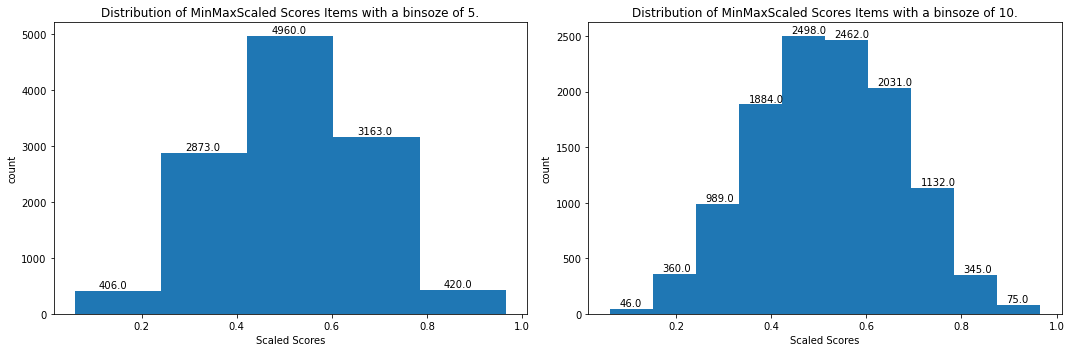

In [105]:
# visual asessment of the didstribution of the data

plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
arr= plt.hist(data= data, x='score_item_scaled_average', bins=5)
plt.title('Distribution of MinMaxScaled Scores Items with a binsoze of 5.')
plt.xlabel('Scaled Scores')
plt.ylabel('count')
for i in range(5):
    plt.text(arr[1][i]+0.05,arr[0][i]+50,str(arr[0][i]))

plt.subplot(1,2,2)
arr= plt.hist(data= data, x='score_item_scaled_average', bins=10)
plt.title('Distribution of MinMaxScaled Scores Items with a binsoze of 10.')
plt.xlabel('Scaled Scores')
plt.ylabel('count')
for i in range(10):
    plt.text(arr[1][i]+0.02,arr[0][i]+25,str(arr[0][i]))

plt.tight_layout()

In [128]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

n_bins= 5 # change this value to change number of y labels categories
y_cat= lb.fit_transform(pd.cut(data['score_item_scaled_average'], n_bins, retbins=True)[0])

In [130]:
# viewing min and max values of y
print(f'max y value: {y_cat.max()}\nMin y value: {y_cat.min()}')

max y value: 4
Min y value: 0


In [131]:
# adjusting the y values to start at 1 and end at
y_cat= y+1

In [132]:
# viewing min and max values of y
print(f'max y value: {y_cat.max()}\nMin y value: {y_cat.min()}')
y_cat

max y value: 6
Min y value: 2


array([5, 5, 4, ..., 5, 5, 5])

In [141]:
y_cont=np.array(data['score_item_scaled_average'].apply(lambda x: round(x, 4)))

In [142]:
y_cont

array([0.698 , 0.735 , 0.472 , ..., 0.6075, 0.6913, 0.6758])